#<h1 style="background-color:green;font-family:Georgia;font-size:350%;text-align:center">Heart Attack Prediction</h1>



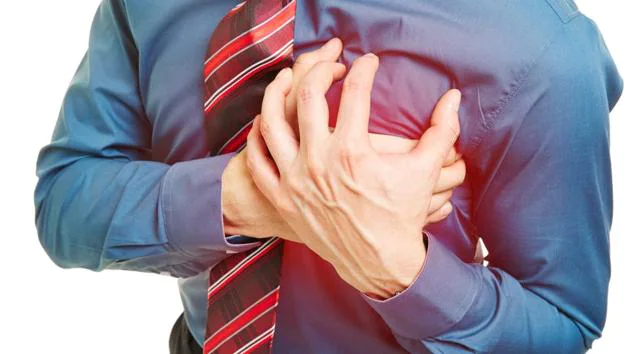

### Importing necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix,auc,roc_curve
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
df = pd.read_csv(r'D:\Projects\Stroke Prediction\healthcare-dataset-stroke-data.csv')

### Looking into dataset to know more about it

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Describing Dataset

In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### checking Missing values

In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Checking missing values visually

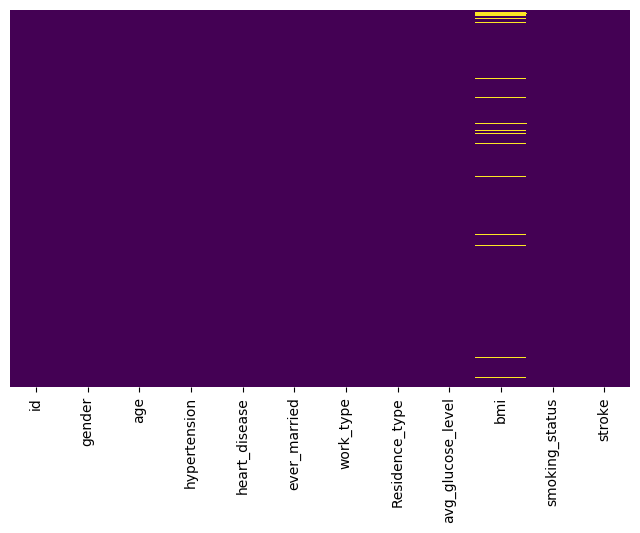

In [6]:
plt.figure(figsize=(8,5),dpi=100)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

### Checking Datatypes 

In [7]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### Filling missing values with Mean in BMI column

In [8]:
df.bmi.fillna(np.round(df.bmi.mean(),2), inplace=True)

### Checking missing values after filling missing values with mean in BMI column

In [9]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Checking missing values visually after filling missing values with mean in BMI column

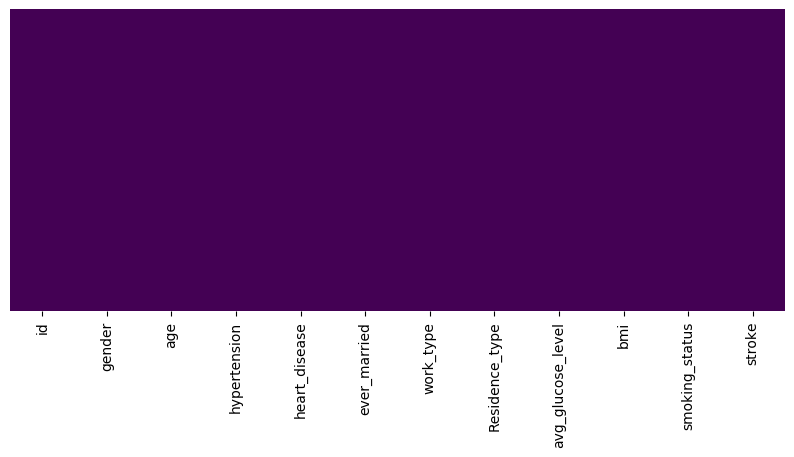

In [10]:
plt.figure(figsize=(10,4),dpi=100)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

### Univariate analysis

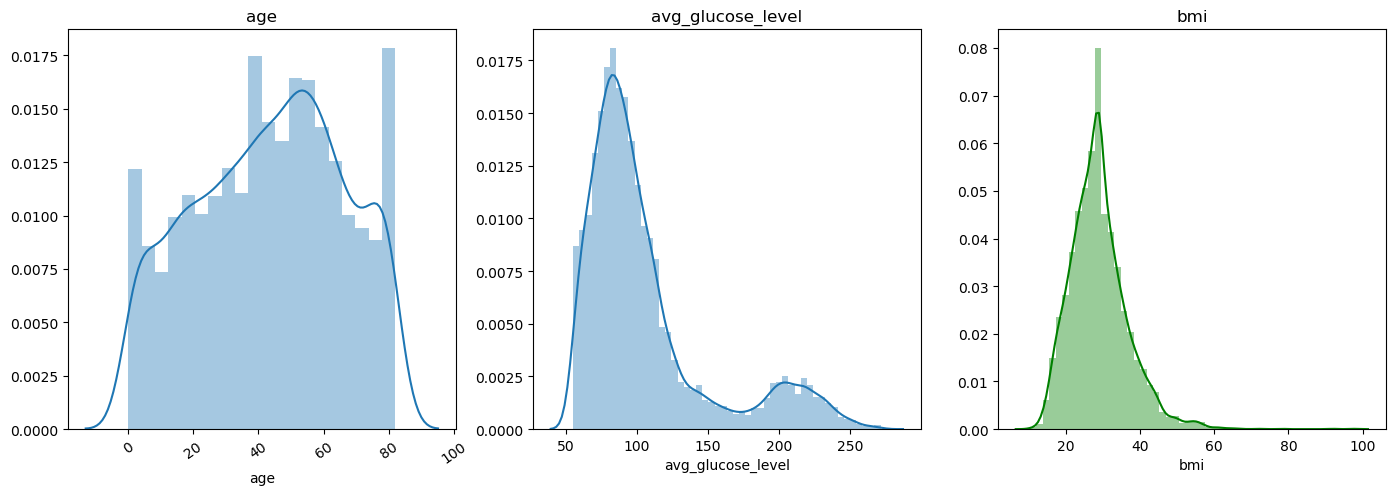

In [11]:
plt.figure(figsize=(17,18),dpi=100)
plt.subplot(331)
sns.distplot(df.age)
plt.title('age');
plt.xticks(rotation=35)
plt.subplot(332)
sns.distplot(df.avg_glucose_level);
plt.title('avg_glucose_level');
plt.subplot(333)
sns.distplot(df.bmi, color='g');
plt.title('bmi');

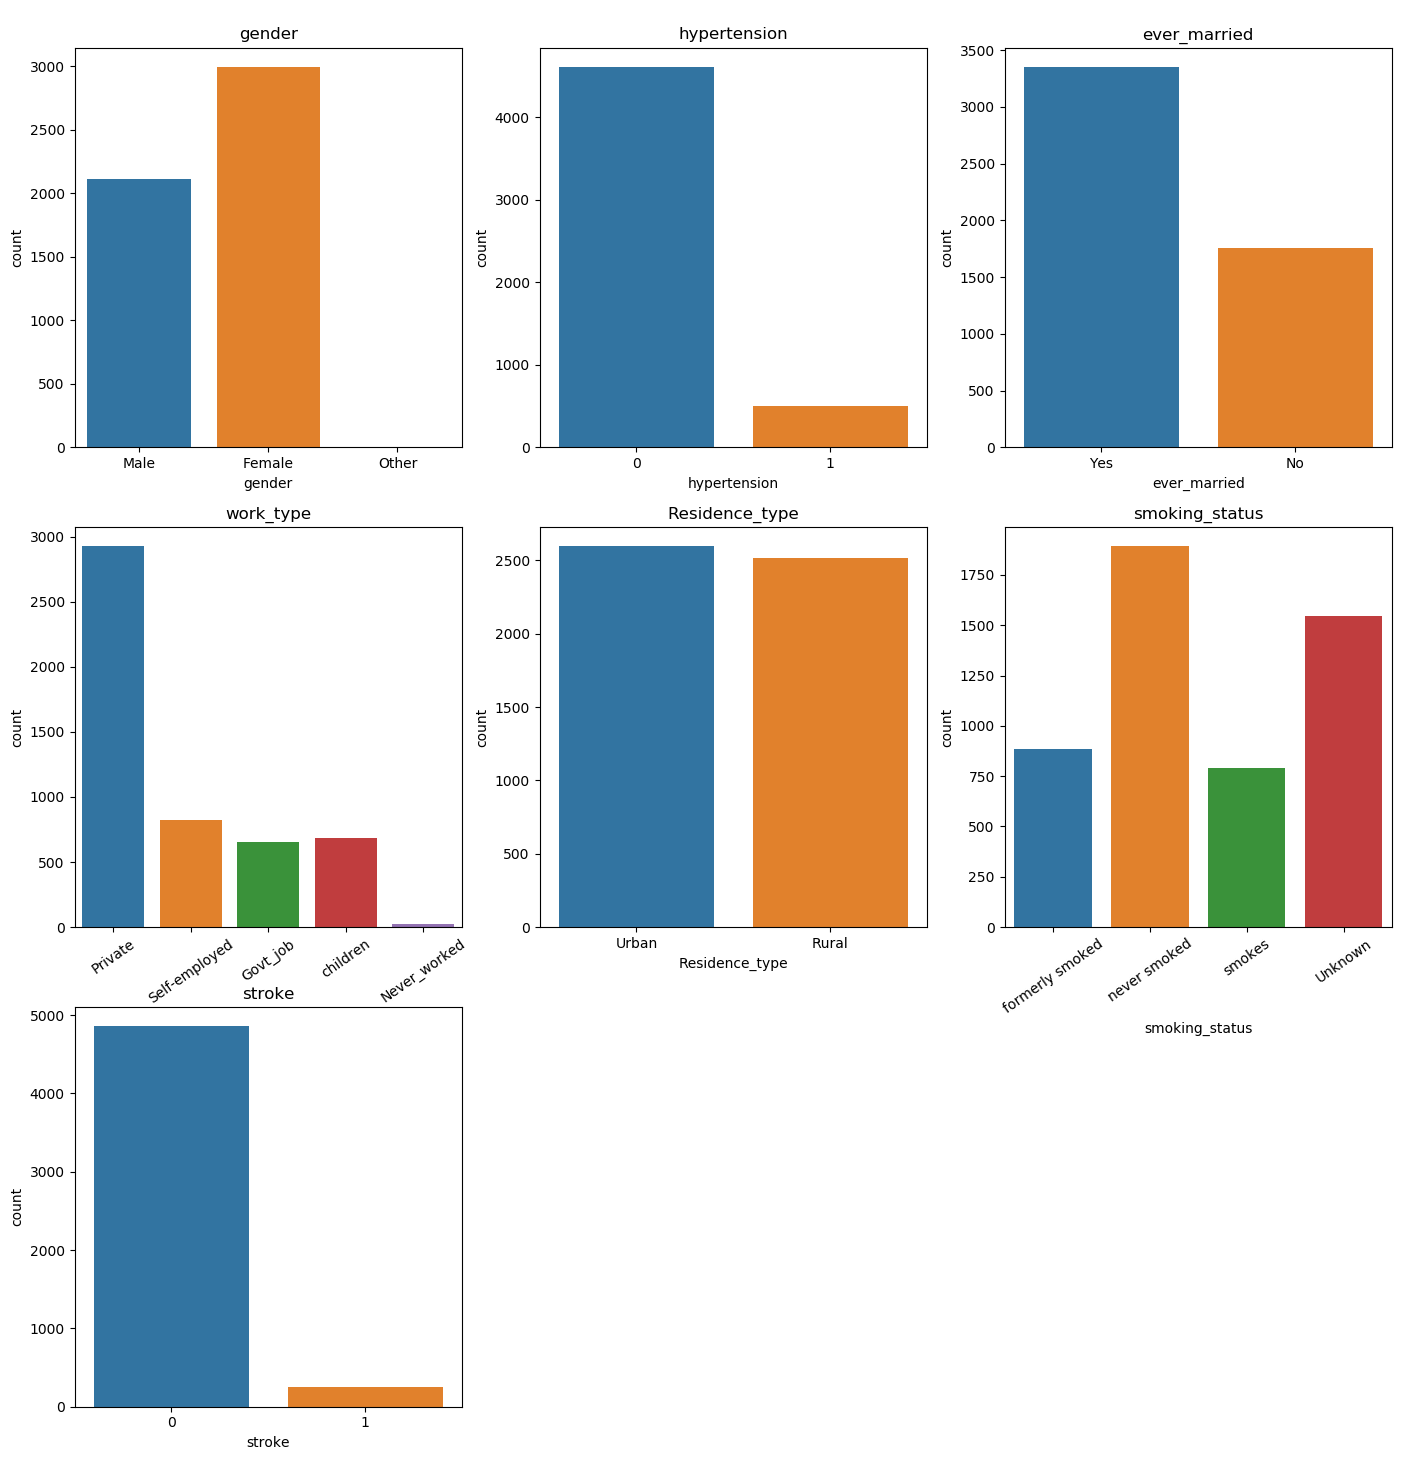

In [12]:
plt.figure(figsize=(17,18),dpi=100)
plt.subplot(331)
sns.countplot(df.gender);
plt.title('\ngender');
plt.subplot(332)
sns.countplot(df.hypertension);
plt.title('hypertension');
plt.subplot(333)
sns.countplot(df.ever_married);
plt.title('ever_married');
plt.subplot(334)
sns.countplot(df.work_type);
plt.title('work_type');
plt.xticks(rotation=35)
plt.subplot(335)
sns.countplot(df.Residence_type);
plt.title('Residence_type');
plt.subplot(336)
sns.countplot(df.smoking_status);
plt.title('smoking_status');
plt.xticks(rotation=35);
plt.subplot(337)
sns.countplot(df.stroke);
plt.title('stroke');

### Bi-variate Analysis

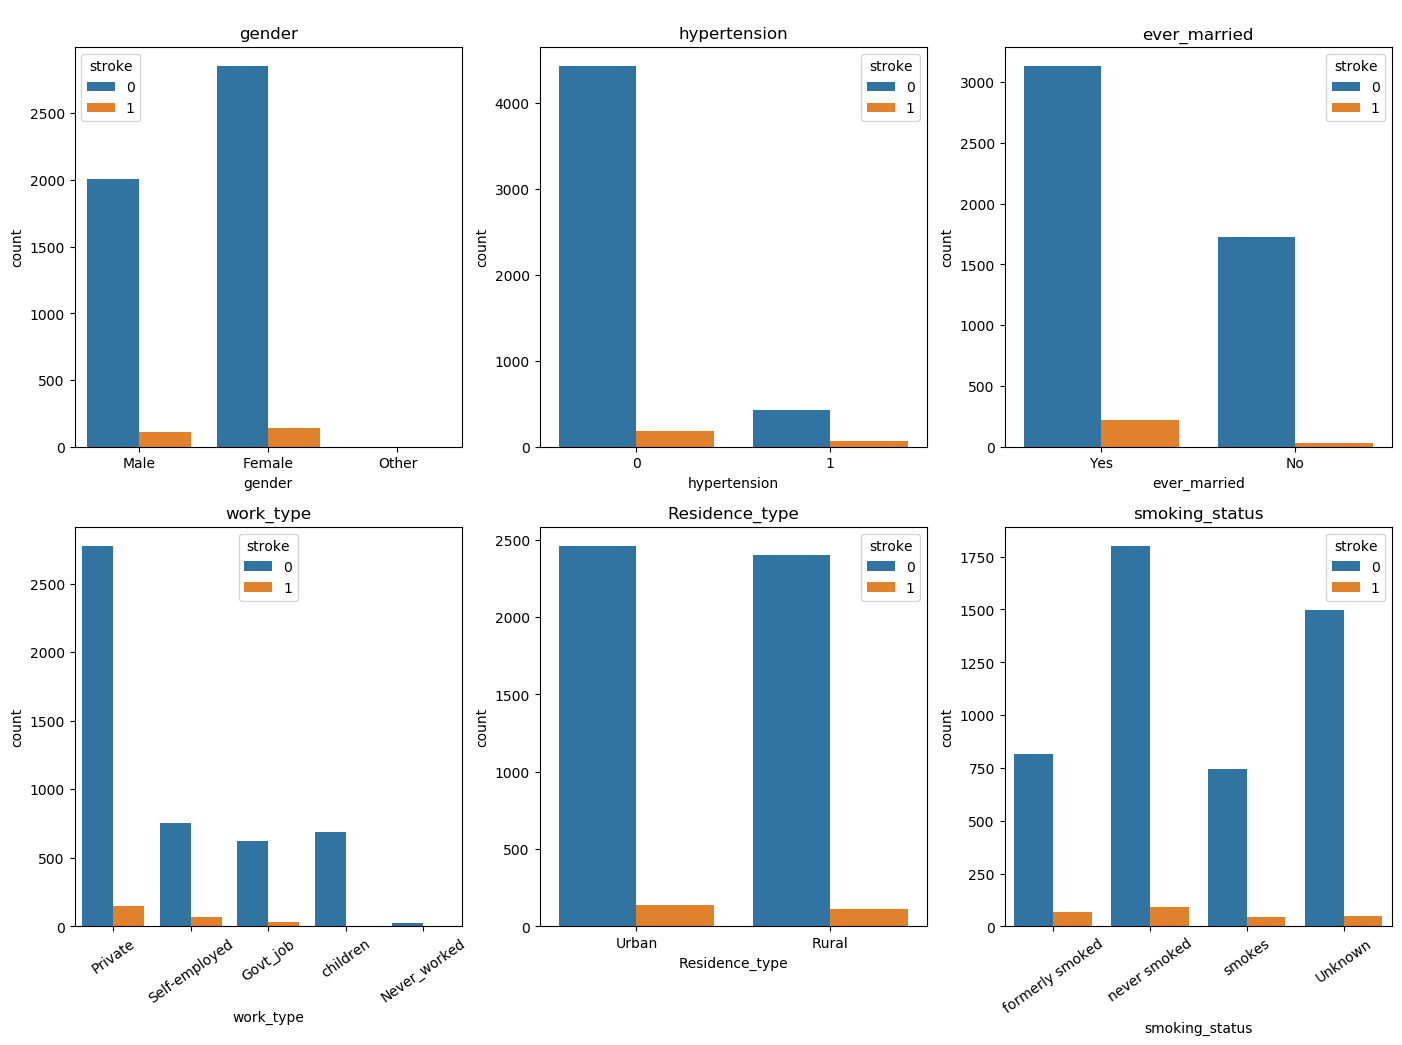

In [13]:
plt.figure(figsize=(17,18),dpi=100)
plt.subplot(331)
sns.countplot(df.gender,hue = df.stroke);
plt.title('\ngender');
plt.subplot(332)
sns.countplot(df.hypertension,hue = df.stroke);
plt.title('hypertension');
plt.subplot(333)
sns.countplot(df.ever_married,hue = df.stroke);
plt.title('ever_married');
plt.subplot(334)
sns.countplot(df.work_type,hue = df.stroke);
plt.title('work_type');
plt.xticks(rotation=35)
plt.subplot(335)
sns.countplot(df.Residence_type,hue = df.stroke);
plt.title('Residence_type');
plt.subplot(336)
sns.countplot(df.smoking_status,hue = df.stroke);
plt.title('smoking_status');
plt.xticks(rotation=35);

### Multivariate Analysis

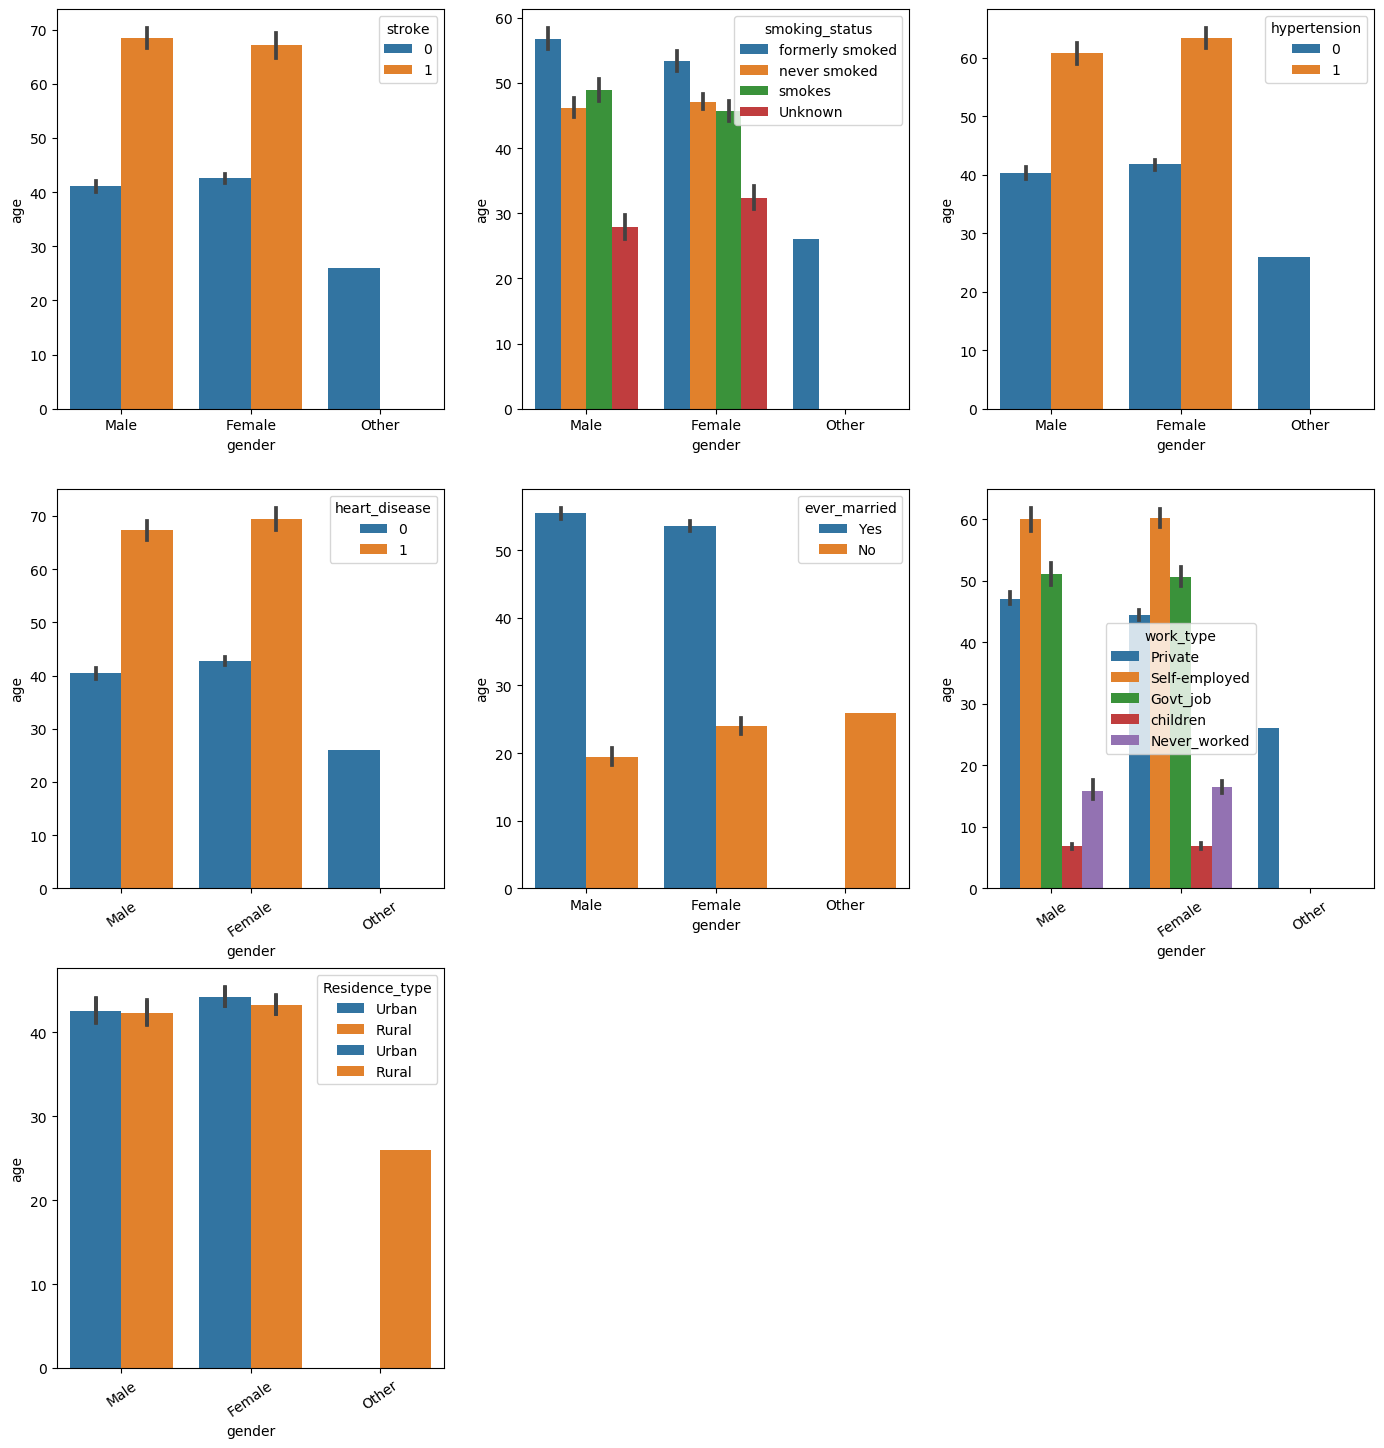

In [14]:
plt.figure(figsize=(17,18),dpi=100)
plt.subplot(331)
sns.barplot(df.gender,df.age,hue = df.stroke);
plt.subplot(332)
sns.barplot(df.gender,df.age,hue = df.smoking_status);
plt.subplot(333)
sns.barplot(df.gender,df.age,hue = df.hypertension);
plt.subplot(334)
sns.barplot(df.gender,df.age,hue = df.heart_disease);
plt.xticks(rotation=35)
plt.subplot(335)
sns.barplot(df.gender,df.age,hue = df.ever_married);
plt.subplot(336)
sns.barplot(df.gender,df.age,hue = df.work_type);
plt.xticks(rotation=35);
plt.subplot(337)
sns.barplot(df.gender,df.age,hue = df.Residence_type);
plt.xticks(rotation=35);
plt.subplot(337)
sns.barplot(df.gender,df.age,hue = df.Residence_type);

### Checking for outliers

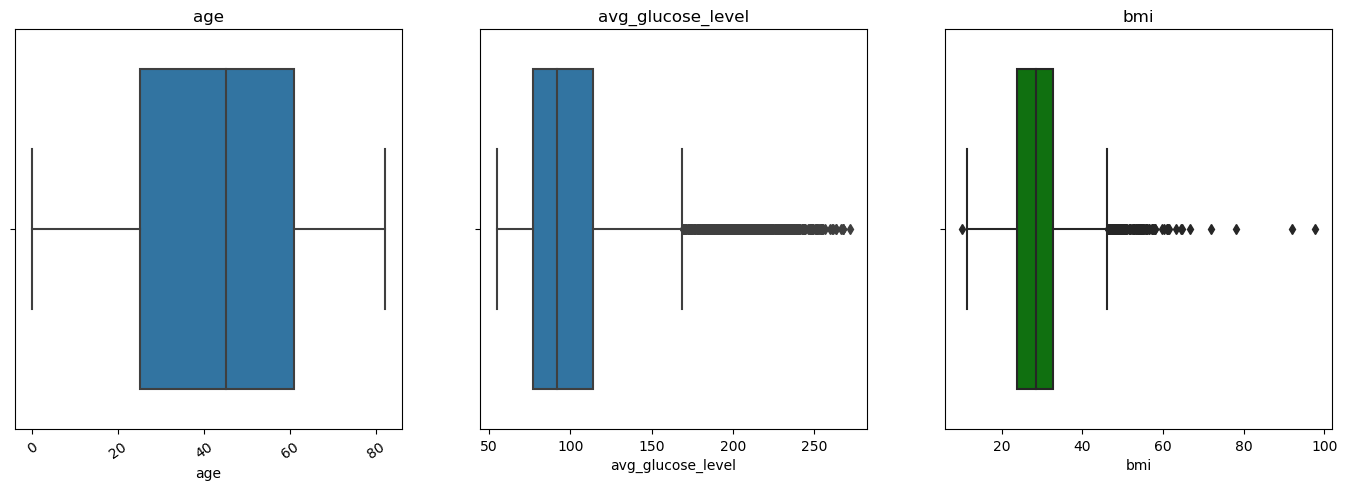

In [15]:
plt.figure(figsize=(17,18),dpi=100)
plt.subplot(331)
sns.boxplot(df.age)
plt.title('age');
plt.xticks(rotation=35)
plt.subplot(332)
sns.boxplot(df.avg_glucose_level);
plt.title('avg_glucose_level');
plt.subplot(333)
sns.boxplot(df.bmi, color='g');
plt.title('bmi');

### didn't find any outliers , we can see some of outliers but they can acceptble in realtime like glucose_level,bmi

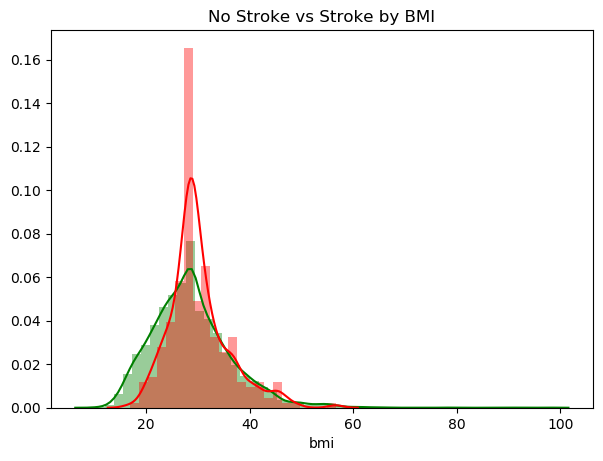

In [16]:
plt.figure(figsize=(7,5),dpi=100)
sns.distplot(df[df['stroke']==0]['bmi'],color='g');
sns.distplot(df[df['stroke']==1]['bmi'],color='r');
plt.title('No Stroke vs Stroke by BMI');

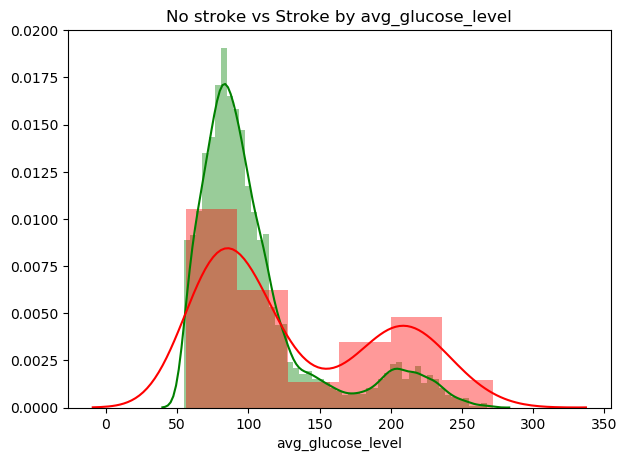

In [17]:
plt.figure(figsize=(7,5),dpi=100)
sns.distplot(df[df['stroke']==0]['avg_glucose_level'],color='g');
sns.distplot(df[df['stroke']==1]['avg_glucose_level'],color='r');
plt.title('No stroke vs Stroke by avg_glucose_level');

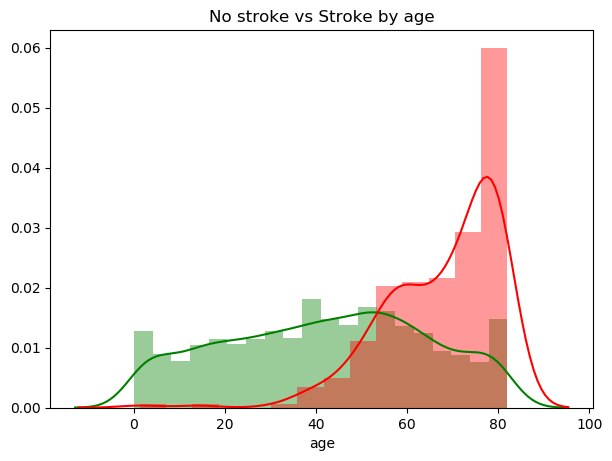

In [18]:
plt.figure(figsize=(7,5),dpi=100)
sns.distplot(df[df['stroke']==0]['age'],color='g');
sns.distplot(df[df['stroke']==1]['age'],color='r');
plt.title('No stroke vs Stroke by age');

## Pairplot

<Figure size 1700x1500 with 0 Axes>

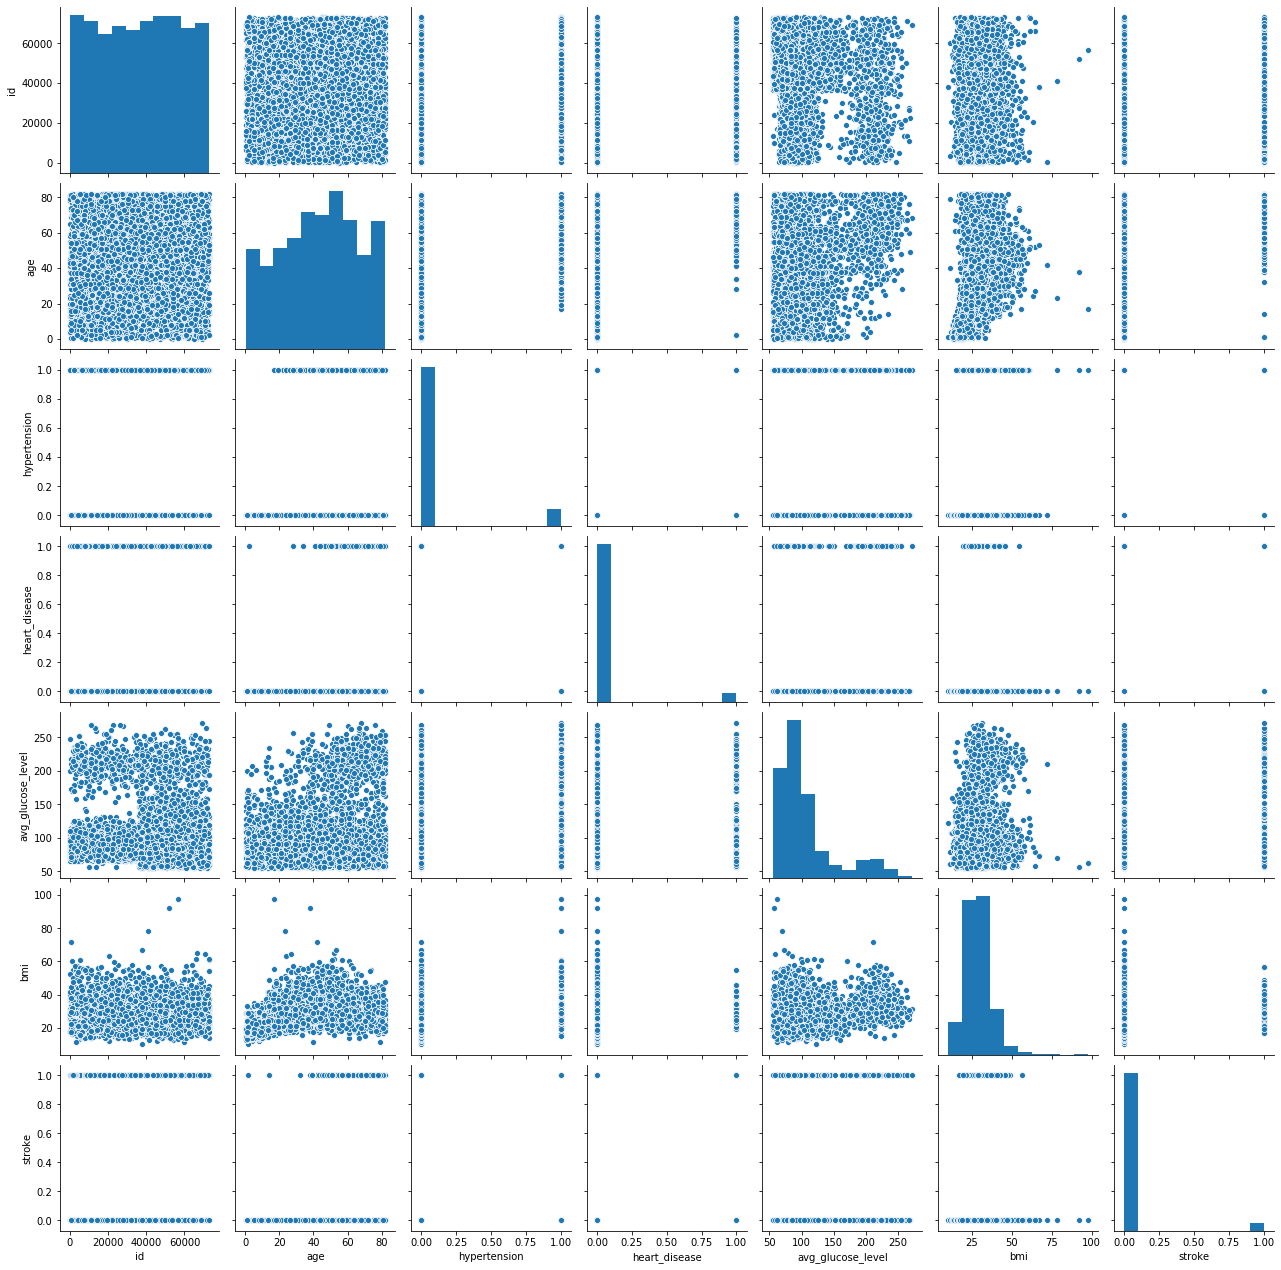

In [19]:
plt.figure(figsize=(17,15),dpi=100)
sns.pairplot(df)
plt.show()

### Lable Encoding for 'gender', 'ever_married','work_type','Residence_type','smoking_status' columns

In [20]:
cols = ['gender', 'ever_married','work_type','Residence_type','smoking_status']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

### Dropping unnecessary columns, in this dataset i can find unnecessary column is ID

In [21]:
df.drop(['id'], axis = 1,inplace = True)

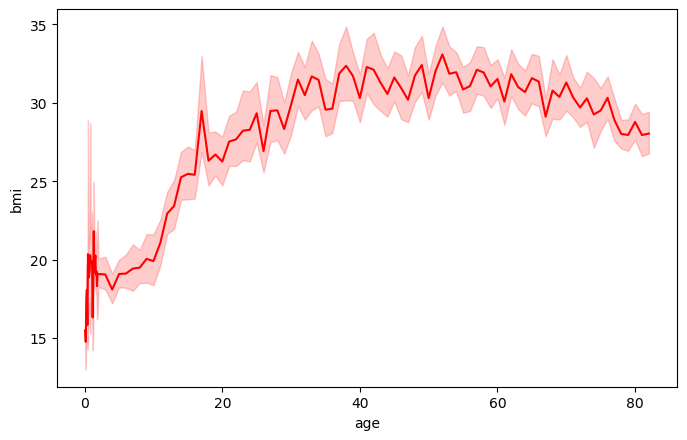

In [22]:
plt.figure(figsize=(8,5),dpi=100)
sns.lineplot(df.age,df.bmi,color = 'r')

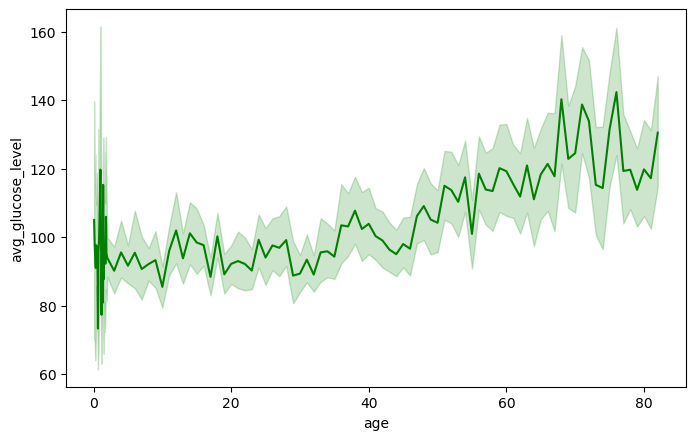

In [23]:
plt.figure(figsize=(8,5),dpi=100)
sns.lineplot(df.age,df.avg_glucose_level,color = 'g');

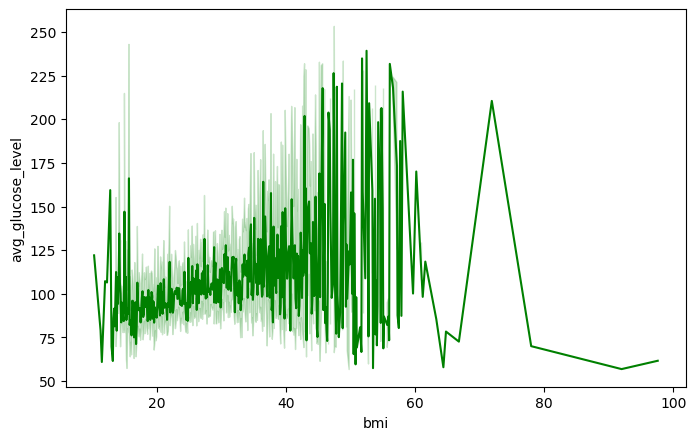

In [24]:
plt.figure(figsize=(8,5),dpi=100)
sns.lineplot(df.bmi,df.avg_glucose_level,color = 'g');

### Checking Dataset is balanced or not

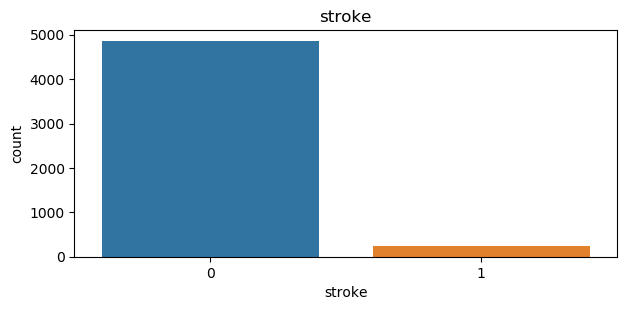

In [25]:
plt.figure(figsize=(7,3),dpi=100)
sns.countplot(df.stroke);
plt.title('stroke');

In [26]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

### we can find that Dataset imbalanced so, we shound make it balanced dataset by using RandomOverSampler library 

In [27]:
x = df.iloc[:,:-1]
y = df['stroke']

In [29]:
from imblearn.over_sampling import RandomOverSampler

In [30]:
nm = RandomOverSampler()
x_res,y_res=nm.fit_sample(x,y)

In [31]:
x_res.shape

(9722, 10)

In [32]:
y_res.shape

(9722,)

In [33]:
pd.value_counts(y_res)

1    4861
0    4861
Name: stroke, dtype: int64

### Values count before and after dataset balance

In [34]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 4861, 1: 249})
Resampled dataset shape Counter({1: 4861, 0: 4861})


### preparing balanced dataset and displaying first few columns

In [35]:
q = pd.DataFrame(x_res)
w = pd.DataFrame(y_res)
bl_df = pd.concat([q,w],axis=1)
bl_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.60,1,1
1,0,61.0,0,0,1,3,0,202.21,28.89,2,1
2,1,80.0,0,1,1,2,0,105.92,32.50,2,1
3,0,49.0,0,0,1,2,1,171.23,34.40,3,1
4,0,79.0,1,0,1,3,0,174.12,24.00,2,1


### cross-checking balanced dataset is balanced or not by count visulization

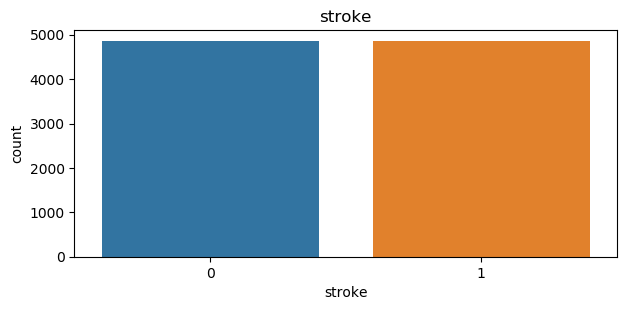

In [36]:
plt.figure(figsize=(7,3),dpi=100)
sns.countplot(bl_df.stroke);
plt.title('stroke');

### We can see balanced dataset with above chart

### Dividing Dependent and Indipendent variables

In [37]:
x = bl_df.iloc[:,:-1]
y = bl_df.iloc[:,-1:]

### Spliting Data into train,test

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state =101)

# 1. Liner regression

In [40]:
Logistc_regression = LogisticRegression().fit(x_train,y_train) 

In [41]:
predictions_logic = Logistc_regression.predict(x_train)
predictions_logic

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [42]:
print(classification_report(y_train,predictions_logic))

              precision    recall  f1-score   support

           0       0.78      0.73      0.76      3864
           1       0.75      0.79      0.77      3913

    accuracy                           0.76      7777
   macro avg       0.77      0.76      0.76      7777
weighted avg       0.77      0.76      0.76      7777



In [43]:
logic_accuracy = np.round(accuracy_score(y_train,predictions_logic),3)*100
logic_accuracy

76.5

In [44]:
FPR, TPR, i = roc_curve(y_train,predictions_logic)

In [45]:
roc_auc_train =auc(FPR,TPR)
print('ROC AUC OF TRAIN : %0.3f'%roc_auc_train)

ROC AUC OF TRAIN : 0.764


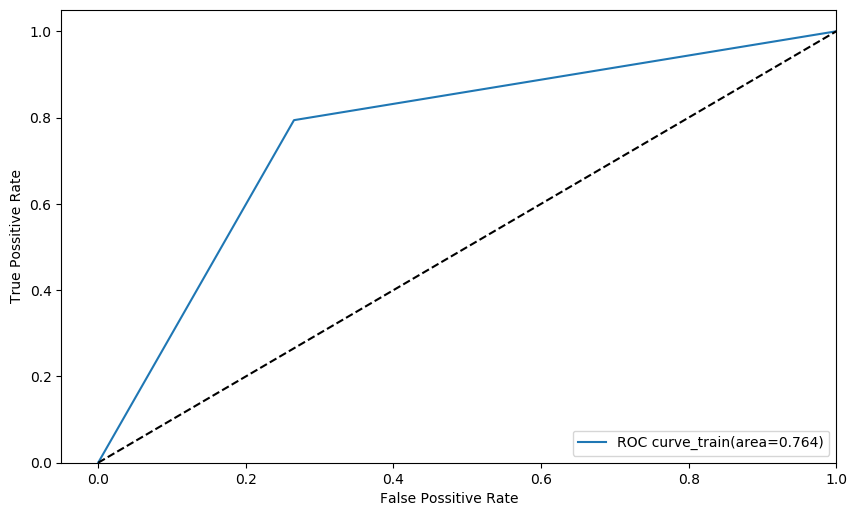

In [46]:
plt.figure(figsize=(10,6),dpi=100)
plt.plot(FPR,TPR,label='ROC curve_train(area=%0.3f)'% roc_auc_train)
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Possitive Rate')
plt.ylabel('True Possitive Rate')
plt.legend(loc='lower right')
plt.show();

# 2. Naive bayes classification

In [47]:
naive_bayes = GaussianNB().fit(x_train,y_train) 
naive_bayes

GaussianNB(priors=None, var_smoothing=1e-09)

In [48]:
predictions_naivebayes = naive_bayes.predict(x_train)
predictions_naivebayes

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [49]:
print(classification_report(y_train,predictions_naivebayes))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75      3864
           1       0.75      0.76      0.76      3913

    accuracy                           0.76      7777
   macro avg       0.76      0.76      0.76      7777
weighted avg       0.76      0.76      0.76      7777



In [50]:
NB_accuracy = np.round(accuracy_score(y_train,predictions_naivebayes),2)*100
NB_accuracy

76.0

# 3. KNN classification

In [51]:
Knn = KNeighborsClassifier().fit(x_train,y_train)
Knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [52]:
predictions_knn = Knn.predict(x_train)
predictions_knn

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [53]:
print(classification_report(y_train,predictions_knn))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      3864
           1       0.91      1.00      0.95      3913

    accuracy                           0.95      7777
   macro avg       0.95      0.95      0.95      7777
weighted avg       0.95      0.95      0.95      7777



In [54]:
KNN_accuracy = np.round(accuracy_score(y_train,predictions_knn),2)*100
KNN_accuracy

95.0

# 4. Decision Tree

In [55]:
DecisionT = DecisionTreeClassifier().fit(x_train,y_train)
DecisionT

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [56]:
predictions_DecisionT = DecisionT.predict(x_train)
predictions_DecisionT

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [57]:
print(classification_report(y_train,predictions_DecisionT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3864
           1       1.00      1.00      1.00      3913

    accuracy                           1.00      7777
   macro avg       1.00      1.00      1.00      7777
weighted avg       1.00      1.00      1.00      7777



In [58]:
DecisionT_accuracy = np.round(accuracy_score(y_train,predictions_DecisionT),2)*100
DecisionT_accuracy

100.0

 # 5. Random forest

In [59]:
Random_F = RandomForestClassifier().fit(x_train,y_train)
Random_F

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
predictions_Random_F = Random_F.predict(x_train)
predictions_Random_F

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [61]:
print(classification_report(y_train,predictions_Random_F))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3864
           1       1.00      1.00      1.00      3913

    accuracy                           1.00      7777
   macro avg       1.00      1.00      1.00      7777
weighted avg       1.00      1.00      1.00      7777



In [62]:
Random_F_accuracy = np.round(accuracy_score(y_train,predictions_Random_F),2)*100
Random_F_accuracy

100.0

# 6. RandomForest_GridSearchCV

In [63]:
Random_F_GCV = RandomForestClassifier()
parameter_grid = {'n_estimators' : [5,10],'criterion' :['gini','entropy'],'max_features':[1,2,3,4]}
grid_search = GridSearchCV(Random_F_GCV,param_grid=parameter_grid,cv=5)

In [64]:
Random_F_GCV_model = GridSearchCV(Random_F_GCV,param_grid=parameter_grid,cv=5).fit(x_train,y_train)

In [65]:
Random_F_GCV_predictions = Random_F_GCV_model.predict(x_train)
Random_F_GCV_predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [66]:
print(classification_report(y_train,Random_F_GCV_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3864
           1       1.00      1.00      1.00      3913

    accuracy                           1.00      7777
   macro avg       1.00      1.00      1.00      7777
weighted avg       1.00      1.00      1.00      7777



In [67]:
Random_F_GCV_accuracy = np.round(accuracy_score(y_train,Random_F_GCV_predictions),2)
Random_F_GCV_accuracy

1.0

### Preparing Dataset for all accuracy values with model names

In [68]:
Data = pd.DataFrame({'Model_name' : ['Logistc_regression','Naive_bayes','KNeighbors','Decision_Tree','Random_Forest','Random_F_GCV_model'],
             'Accuracy_of_the_Model' : [logic_accuracy,NB_accuracy,KNN_accuracy,DecisionT_accuracy,Random_F_accuracy,Random_F_GCV_accuracy]})

### Dataset of accuracy values

In [69]:
Data

,Model_name,Accuracy_of_the_Model
0,Logistc_regression,76.5
1,Naive_bayes,76.0
2,KNeighbors,95.0
3,Decision_Tree,100.0
4,Random_Forest,100.0
5,Random_F_GCV_model,1.0


### Identified the bestfit model is KNeighbors model with accuracy 95%

### Visually identifing the bestfit model

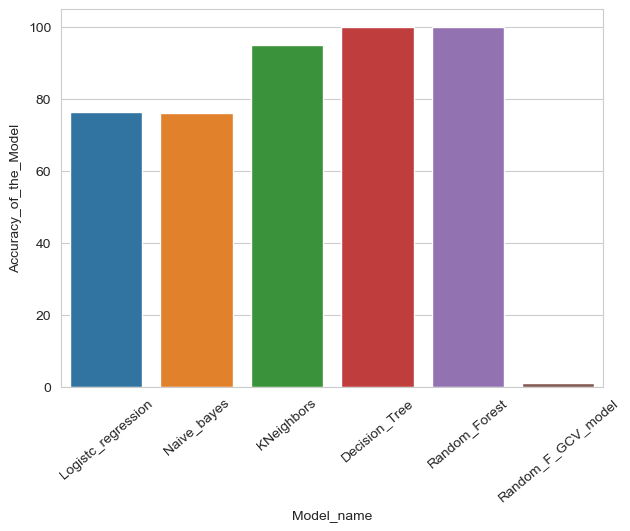

In [70]:
plt.figure(figsize=(7,5),dpi=100)
sns.set_style('whitegrid')
sns.barplot(Data.Model_name,Data.Accuracy_of_the_Model);
plt.xticks(rotation=40);

### Choosing KNN as Best fitmodel with accuracy score 95 %
#### Predicting stroke for Test Data with KNN model

In [71]:
prediction_model = KNeighborsClassifier().fit(x_train,y_train)
prediction_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Predictions for the test data

In [72]:
prediction_model.predict(x_test)

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

### Assigning predicted values with test dataset  

In [73]:
x_test['stroke'] = prediction_model.predict(x_test)

In [75]:
x_test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
7343,0,57.0,0,0,1,0,1,110.52,28.50,0,1
2267,0,44.0,0,0,0,2,0,92.72,36.60,2,0
2773,1,26.0,0,0,1,0,1,94.24,29.20,1,0
3593,0,43.0,0,0,1,3,1,87.41,39.70,1,0
1214,1,51.0,0,0,1,2,0,217.71,28.89,1,0


### Predicted Values

In [76]:
x_test['stroke'].head()

7343    1
2267    0
2773    0
3593    0
1214    0
Name: stroke, dtype: int64

### ======================================  End of Code =======================================

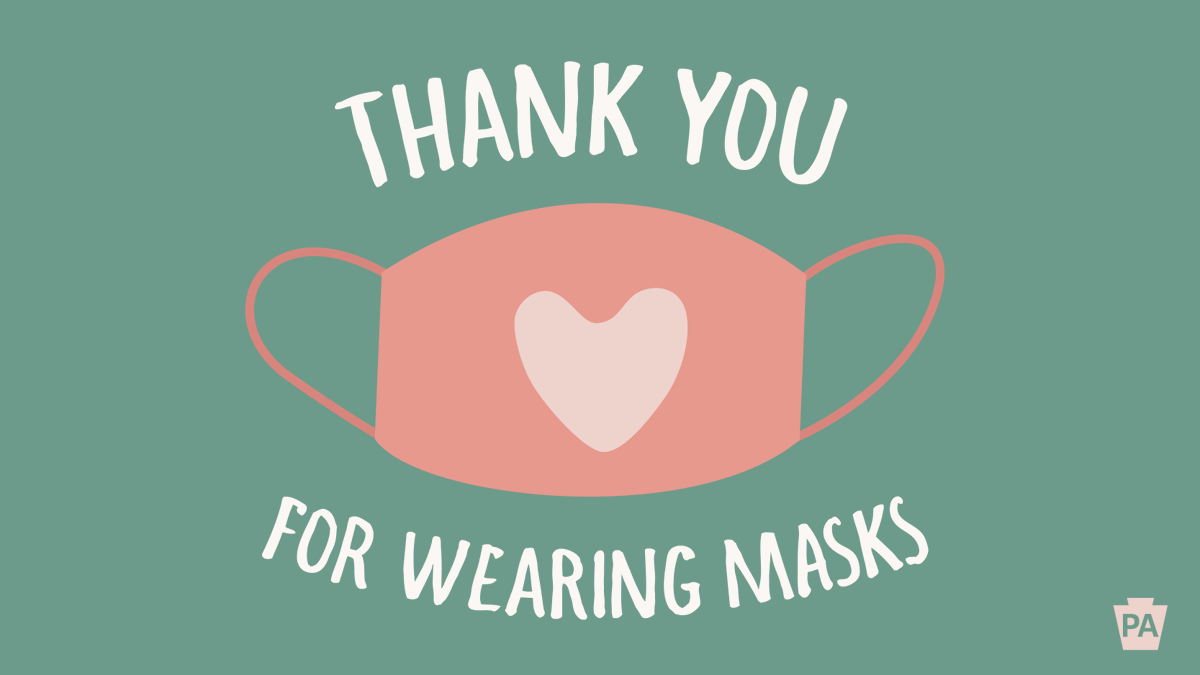